In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans

In [4]:
plt.rcParams["figure.facecolor"]=(1,1,1,1)

# Data generation

To make things simple, we use only two features $X1$ and $X2$ that are randomly sampled from two normal distributions $N(3, 4)$ and $N(0, 1)$ that represent two classes $N$ (negative) and $P$ (positive). The sample sizes are 40 and 20, respectively.

In [28]:
X1 = 2*np.random.randn(40,2) + 3
X2 = np.random.randn(20,2)
y1 = np.array(40*['N'])
y2 = np.array(20*['P'])

Text(0, 0.5, '$x_2$')

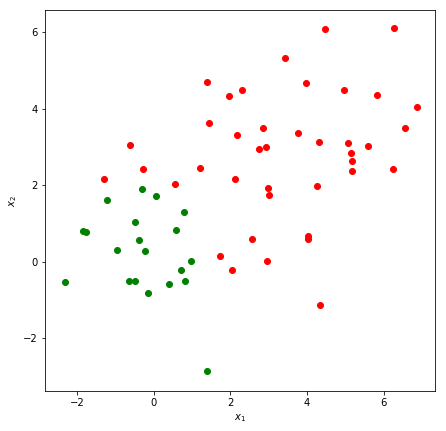

In [29]:
X1 = 2*np.random.randn(40,2) + 3
X2 = np.random.randn(20,2)
y1 = np.array(40*['N'])
y2 = np.array(20*['P'])

plt.figure(figsize=(7,7))
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='g')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [30]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y)



#np.savez('sample_class_data', X_train, y_train, X_test, y_test)
#data=np.load('class_data.npz')
#X_train = data['arr_0']
#y_train = data['arr_1']
#X_test = data['arr_2']
#y_test = data['arr_3']


# Nearest centroid

This is the simplest classifier. In the scatter plot below we can see how the features from the two classes are distributed in the training data (red and green dots). The blue crosses show the locations of the class centroids.

Text(0, 0.5, '$x_2$')

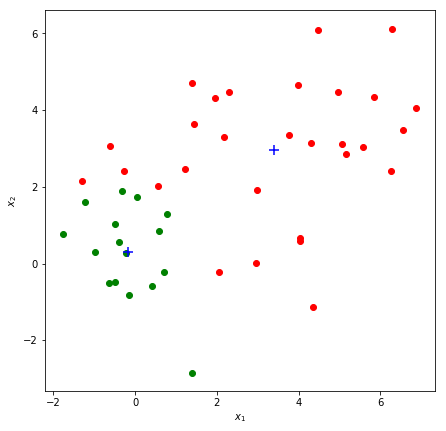

In [31]:
nc = NearestCentroid()
nc.fit(X_train,y_train)

yp = y_train == 'P'
yn = y_train == 'N'
plt.figure(figsize=(7,7))
plt.scatter(X_train[yp,0], X_train[yp,1], c='g')
plt.scatter(X_train[yn,0], X_train[yn,1], c='r')
plt.scatter(nc.centroids_[:,0],nc.centroids_[:,1], c='b', marker='+', s=100)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Then we evaluate the performance of the classifier using independent test data. There are many evaluation metrics, but for simplicity we use the mean accuracy.

In [32]:
nc.score(X_test,y_test)

0.9333333333333333

Next we predict the labels and produce true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN). These are visualize in the scatter plot below using different colors.

In [24]:
print(y_train)
y_pred = nc.predict(X_test)
tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.scatter(nc.centroids_[:,0],nc.centroids_[:,1], c='b', marker='+', s=100)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

['N' 'P' 'N' 'P' 'P' 'N' 'P' 'N' 'N' 'P' 'N' 'N' 'N' 'N' 'P' 'P' 'N' 'N'
 'N' 'N' 'P' 'N' 'P' 'N' 'N' 'P' 'P' 'N' 'N' 'N' 'N' 'N' 'P' 'N' 'N' 'N'
 'N' 'P' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


Text(0, 0.5, '$x_2$')

Also, we visualize the decision boundary between the two classes below.

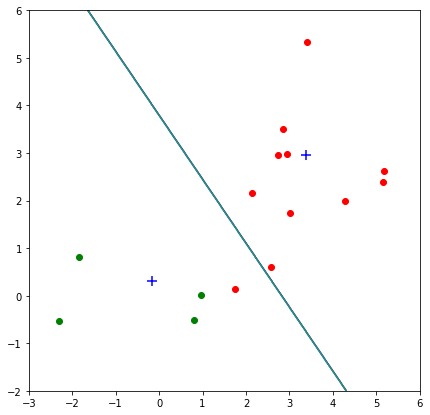

In [37]:
x, y = np.meshgrid(np.linspace(-3,6,1000),np.linspace(-2,6,1000))


grid = np.vstack((x.flatten(), y.flatten())).T


db = nc.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.scatter(nc.centroids_[:,0],nc.centroids_[:,1], c='b', marker='+', s=100)
plt.contour(x, y, db, 1)

# Nearest neighbors

In [38]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

1.0

In [39]:
tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

In [40]:
db = knn.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

Text(0, 0.5, '$x_2$')

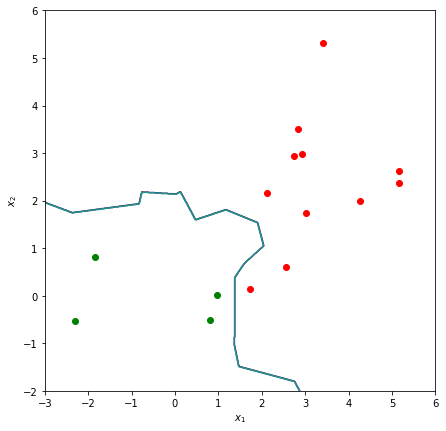

In [41]:
plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

We can see that the decision boundary is affected by single training samples. To make it more smooth we use three nearest neighbors to predict the label ($kNN$ with $k=3$).

Text(0, 0.5, '$x_2$')

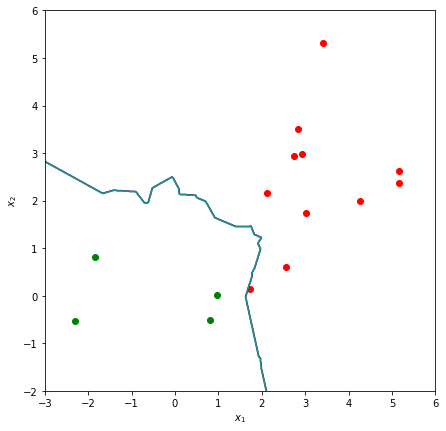

In [43]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred = knn.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')


db = knn.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Support vector machine

First we try the support vector classifier with a linear kernel.

Text(0, 0.5, '$x_2$')

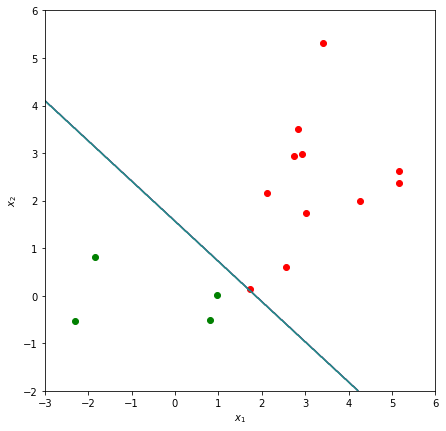

In [44]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
y_pred = svc.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

db = svc.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Then we replace the linear kernel with a nonlinear radial basis function kernel.

Text(0, 0.5, '$x_2$')

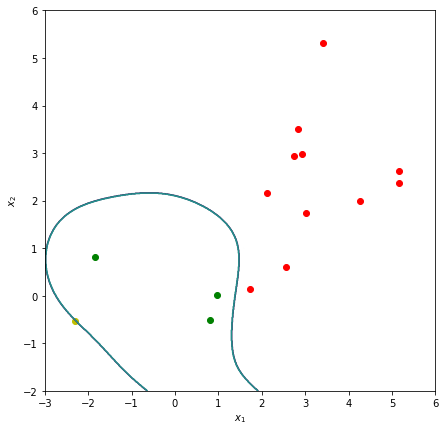

In [45]:
svc = SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
svc.score(X_test,y_test)
y_pred = svc.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

db = svc.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Bayesian classifier

For simplicity we use Gaussian Naive Bayes classifier and assume that the observations are statistically independent and follow Gaussian distribution.

Text(0, 0.5, '$x_2$')

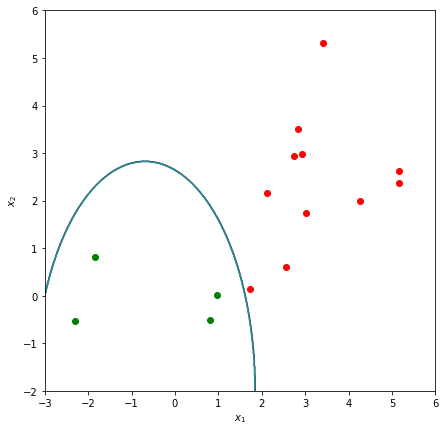

In [47]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)
y_pred = gnb.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

db = gnb.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


# Decision tree

Text(0, 0.5, '$x_2$')

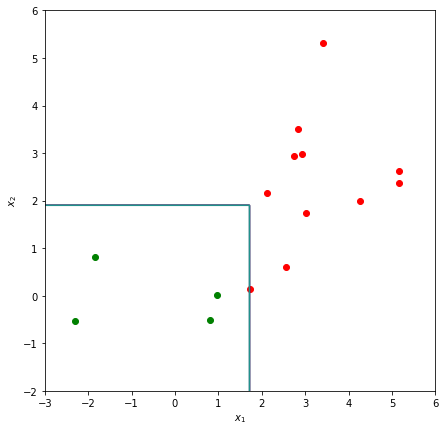

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)
y_pred = dtc.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

db = dtc.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

To visualize the three structure, we export it to a separate file that can be converted to graphics using dot (in Linux).

In [49]:
export_graphviz(dtc, 'tree.dot', class_names=['N','P'])

# Random forest

Text(0, 0.5, '$x_2$')

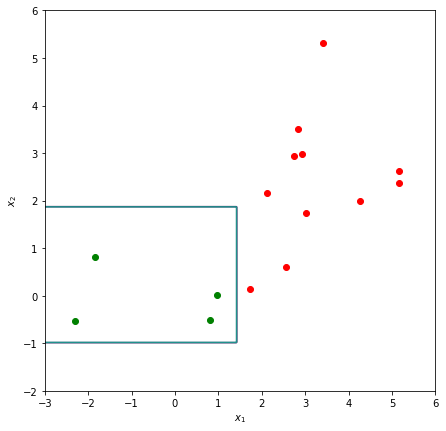

In [50]:
rfc = RandomForestClassifier(n_estimators=4, max_depth=2, random_state=0)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)
y_pred = rfc.predict(X_test)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

db = rfc.predict(grid).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Again, we export the tree structures to visualize them.

In [51]:
estimator = rfc.estimators_[0]
for i,est in enumerate(rfc.estimators_):
    export_graphviz(est, 'rand_forest_'+str(i)+'.dot', class_names=['N','P'])

export_graphviz(estimator, 'rand_forest.dot', class_names=['N','P'])

# Multilayer perceptron

Then we train a neural network, multilayer perceptron (MLP), with a single hidden layer consisting of four nodes. Before using the network we normalize our features by removing the mean and scaling to unit variance.

C:\Users\Sicil\AppData\Local\Continuum\anaconda3\envs\Jupyter Machine Vision\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '$x_2$')

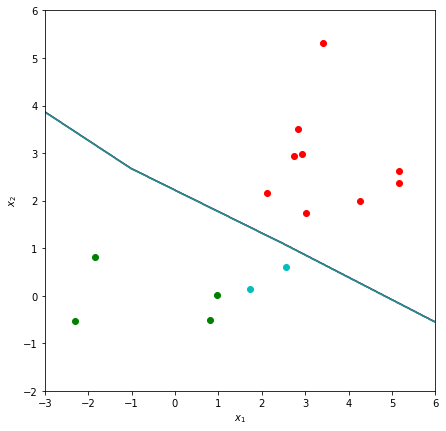

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(4,),max_iter=500)
mlp.fit(X_train_s,y_train)
mlp.score(X_test_s,y_test)
y_pred = mlp.predict(X_test_s)

tp = np.logical_and(y_test == 'P', y_pred == 'P')
tn = np.logical_and(y_test == 'N', y_pred == 'N')
fp = np.logical_and(y_test == 'N', y_pred == 'P')
fn = np.logical_and(y_test == 'P', y_pred == 'N')

grid_s = scaler.transform(grid)
db = mlp.predict(grid_s).reshape(1000,1000)
db = (db == 'P').astype(np.uint8)

plt.figure(figsize=(7,7))
plt.scatter(X_test[tp,0], X_test[tp,1], c='g')
plt.scatter(X_test[tn,0], X_test[tn,1], c='r')
plt.scatter(X_test[fp,0], X_test[fp,1], c='c')
plt.scatter(X_test[fn,0], X_test[fn,1], c='y')
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# K-means

All previous classifiers were based on supervised training. Next, we try to classify our data using unsupervised training (clustering) with the K-means method. First, we assume that the number of clusters is two. The classification result with the test data is shown below. The cluster centroids are visualized with crosses. Notice that the classifier does not know the original labels, so we do not calculate any evaluation metric.

In [53]:
km = KMeans(n_clusters=2, random_state=0)
km.fit(X_train)
y_pred = km.predict(X_test)
c1 = y_pred == 0
c2 = y_pred == 1
db = km.predict(grid).reshape(1000,1000)

plt.figure(figsize=(7,7))
plt.scatter(X_test[c1,0], X_test[c1,1], c='y')
plt.scatter(X_test[c2,0], X_test[c2,1], c='k')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c='b', marker='+', s=100)
plt.contour(x, y, db, 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

Then, we increase the number of clusters to four, and perform the clustering once again.

Text(0, 0.5, '$x_2$')

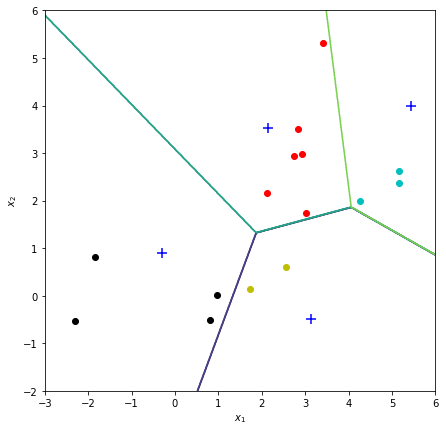

In [54]:
km = KMeans(n_clusters=4, random_state=0)
km.fit(X_train)
y_pred = km.predict(X_test)

c1 = y_pred == 0
c2 = y_pred == 1
c3 = y_pred == 2
c4 = y_pred == 3

db = km.predict(grid).reshape(1000,1000)

plt.figure(figsize=(7,7))
plt.scatter(X_test[c1,0], X_test[c1,1], c='y')
plt.scatter(X_test[c2,0], X_test[c2,1], c='k')
plt.scatter(X_test[c3,0], X_test[c3,1], c='r')
plt.scatter(X_test[c4,0], X_test[c4,1], c='c')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c='b', marker='+', s=100)
plt.contour(x, y, db, 4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')